# 1D Exercises

## 1. Elliptic 1D Problems


### 1.1 Introduction

In M++ also some 1D Problems are implemented. 1D Problems are great for testing methods, as we know the exact solutions in many cases, since the Problem is just an ODE. An example is the "1D Laplace" problem, which is given just by
$ - u^{\prime \prime}(x) = 0 $.

In [1]:
import sys
sys.path.append('../..')

from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import ipywidgets as widgets
import python.mppy as mppy
from plotting import *
import pandas as pd
from IPython.display import HTML

mpp = mppy.Mpp(kernels=4,
               mute=False,
               executable='M++',
               project_name='tutorial',
               cmake_args = ['-DBUILD_TUTORIAL=ON'])

mpp.clean_data()
mpp.build()


================ running cmake ================

-- PROJECT_BINARY_DIR= /home/david/ianm/mpp/mpp/build
-- PROJECT_SOURCE_DIR= /home/david/ianm/mpp/mpp
-- PROJECT_MPP_DIR=    /home/david/ianm/mpp/mpp
-- Option:     BUILD_UQ= OFF   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppRelease   (using cached value)
-- Option:     DEBUG_LEVEL= 1   (using cached value)
-- Option:     CPP_VERSION= 20   (using cached value)
-- Option:     CMAKE_CXX_STANDARD=    (using cached value)
-- Option:     CPP_COMPILER_TYPE= c++   (using cached value)
-- Option:     SUPPRESS_WARNINGS= OFF   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     CONST_GEOMETRIC_TOLERANCE= 1e-10   (using cached value)
-- Option:     CONST_NEAR_ZERO= 1e-15   (using cached value)
-- Option:     CONST_VERY_LARGE= 1e30   (using cached value)
-- Option:     CONST_INFTY= 1e100   (using cached value)
-- Option:     SPACE_DIM= 3   (using cached value)
-- Option:     USE_SPACETIME= OFF   (us

0

In [ ]:
mpp.run(1, config="TUT_laplace", kwargs={"Problem": "Laplace1D"})

As in the 2D case M++ provides some tools for simple 1D plot generation. 

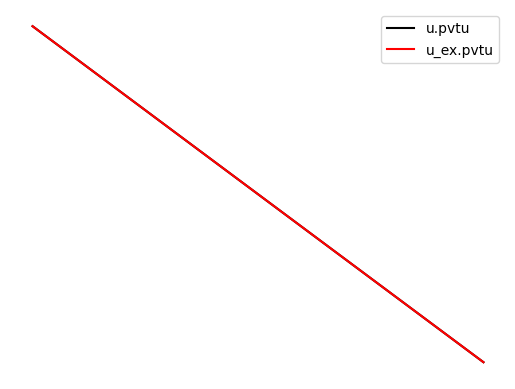

In [4]:
p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu', cell_data=False) 
p.add_1d_vtu('u_ex.pvtu', color='red', cell_data=False)
plt.legend()

plt.show()

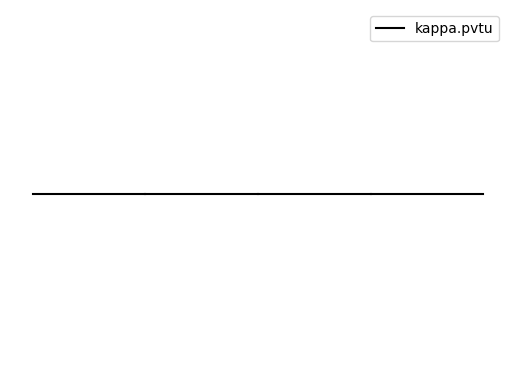

In [5]:
p = mpp.vtu_plot()
p.add_1d_vtu('kappa.pvtu') 
plt.legend()

plt.show()

In plotting.py a 

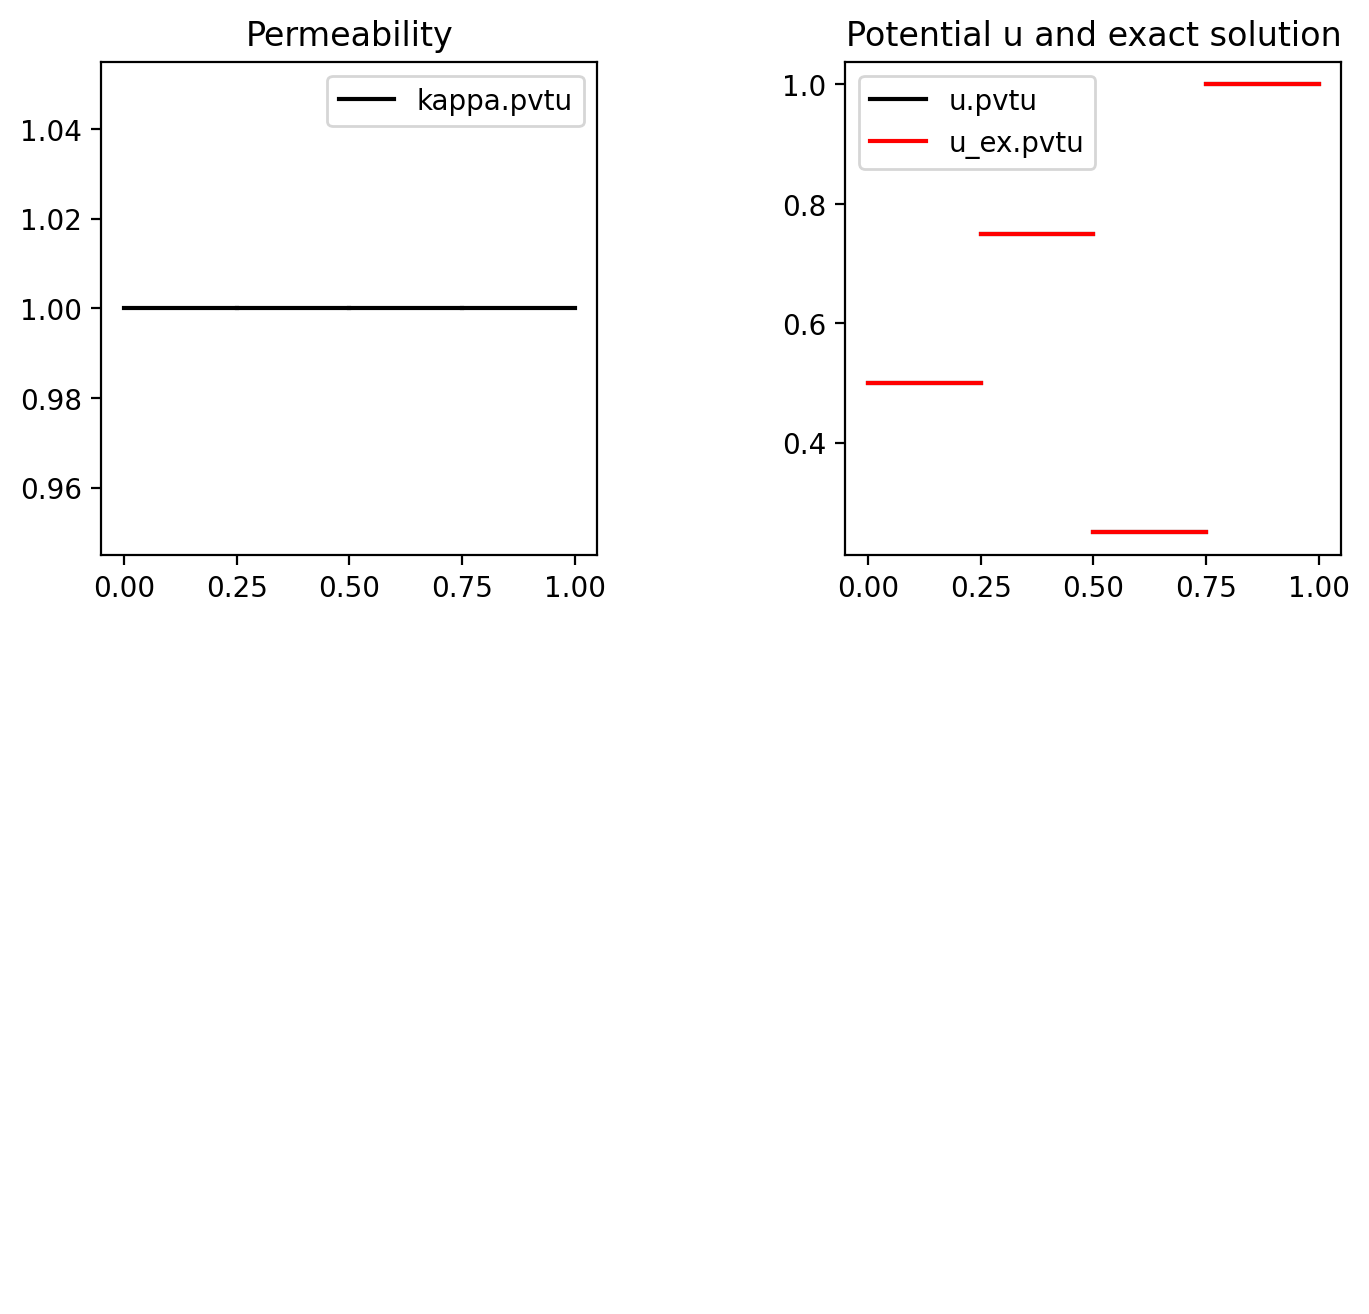

In [6]:
summarize_plot_1d(mpp, exact_solution="u_ex.pvtu")

### 1.2 Problem Discontinuous 1D

As in the two-dimensional case we can look at the same Problem with a discontinuous permeability by using Problem=Discontinuous1D. The Permability is given by 
$ \kappa(x) = 
            \begin{cases}
                10 \ , \quad \text{für } x \in [0.3,0.7] \\
                1 \ \ , \quad \text{sonst}
            \end{cases}$.

In [ ]:
mpp.run(1, config="TUT_laplace", kwargs={"Problem": "Discontinuous1D"})

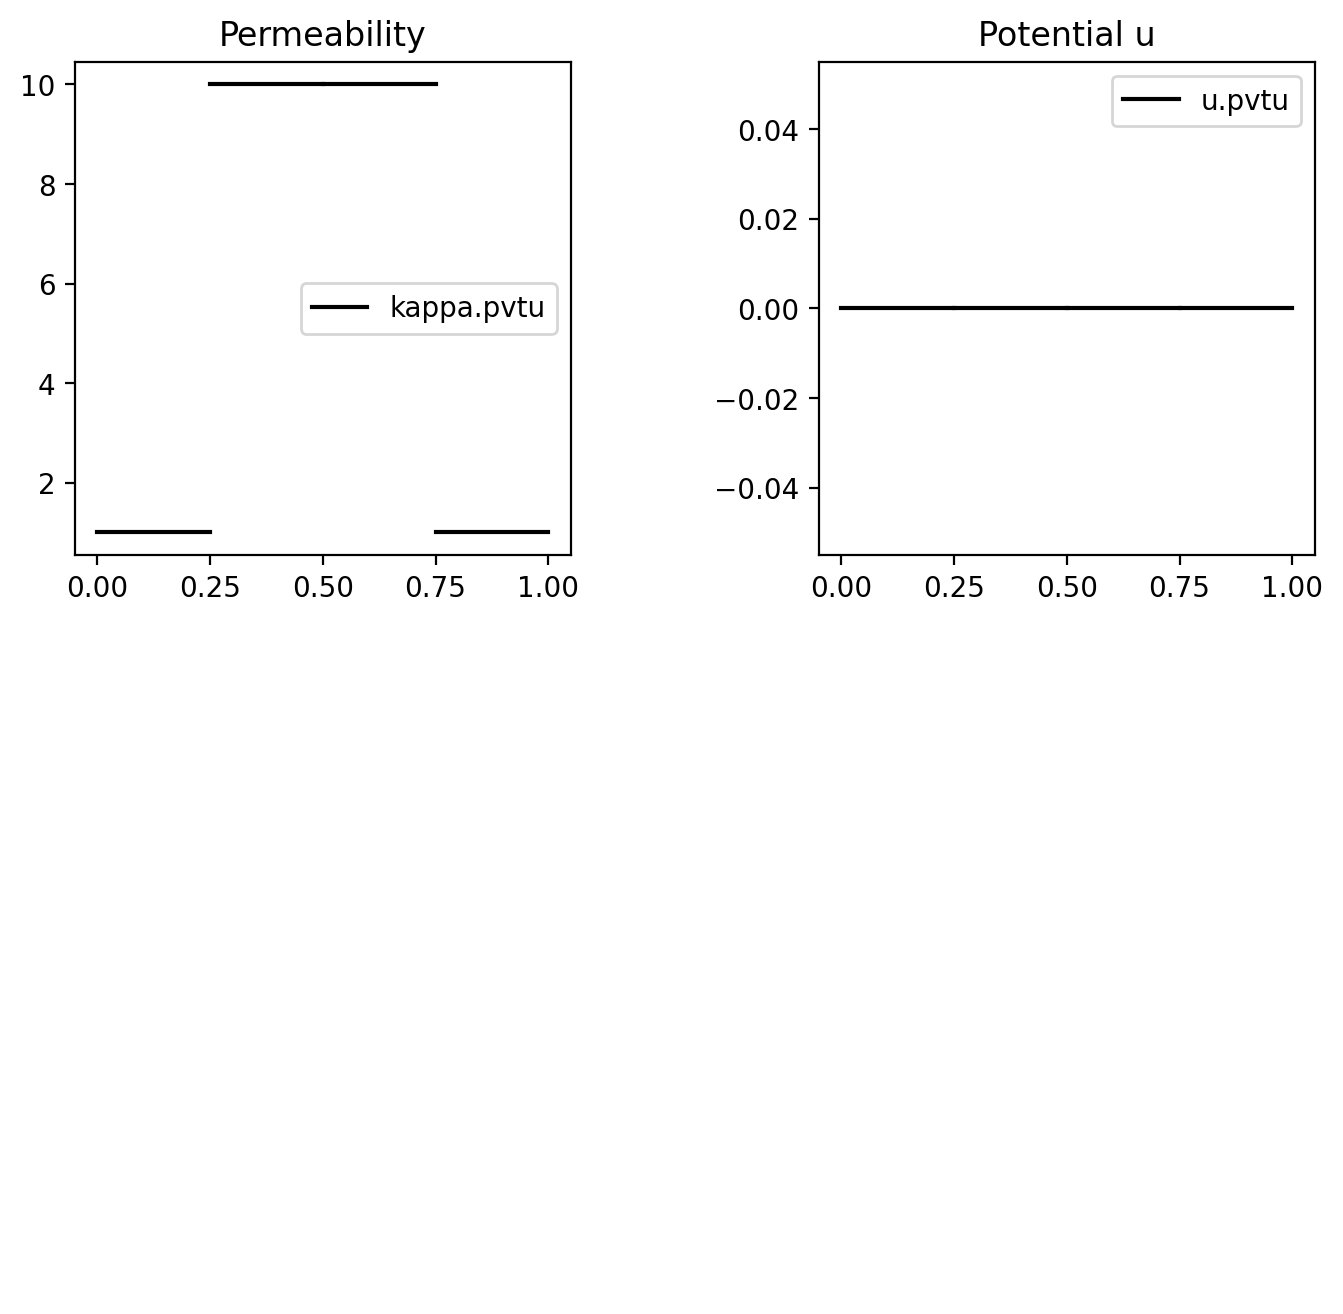

In [8]:
summarize_plot_1d(mpp)

### 1.3  Lagrange Finite Elements

In [25]:
mpp.reset_data()

dict_columns = {
    "Config Info.level": "Level",
    "Config Info.Problem": "Problem",
    "Solution Info.Inflow": "Inflow",
    "Solution Info.Outflow": "Outflow",
    "Solution Info.FluxLoss": "Flux Loss",
    "Solution Info.FluxError": "Flux Error"
}

for problem in ["Laplace1D", "Discontinuous1D"]:
    for level in range(3, 7):
        kwargs = {"Problem": problem, "level": level}
        mpp.run(1, config="TUT_laplace", kwargs=kwargs)
        mpp.parse_json()
        
df = pd.DataFrame(pd.json_normalize(mpp.data), columns=list(dict_columns.keys()))
df.rename(columns=dict_columns, inplace=True)
HTML(df.to_html(index=False))


================ running  mpp ================

start program on 1 procs at Wed Jul  3 18:24:16 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 3
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ..

### 1.4 Preconditioners and linear solvers

In [13]:
mpp.reset_data()

lin_solver = ["GMRES","CG"]
preconditioner = ["Jacobi","SSOR","GaussSeidel","Multigrid"]

kwargs = {"Problem":"Laplace1D","level": 6, 
          "LinearSteps": 800, "LinearVerbose": 1,
          "plevel": 2, "BasePreconditioner": "PS"}

dict_columns = {
    "Config Info.level": "Level",
    "Config Info.Problem": "Problem",
    "Config Info.Preconditioner": "Preconditioner",
    "Config Info.LinearSolver": "Linear Solver", 
    "Solution Info.LinearSteps": "Linear Steps",
}

for linsol in lin_solver:
    kwargs["LinearSolver"] = linsol
    for prec in preconditioner:
        kwargs["Preconditioner"] = prec

        mpp.run(4, config="TUT_laplace", kwargs=kwargs)
        adds = {"Preconditioner":prec,
                "Linear Solver":linsol}
        mpp.parse_json()
    
df = pd.DataFrame(pd.json_normalize(mpp.data), columns=list(dict_columns.keys()))
df.rename(columns=dict_columns, inplace=True)
pivot_df = df.pivot_table(index='Preconditioner', columns=['Linear Solver'], values='Linear Steps', aggfunc='first')
styled_pivot_df = (pivot_df.style
                   .set_properties(**{'text-align': 'center'})
                   .format("{:.0f}"))
styled_pivot_df


================ running  mpp ================

start program on 4 procs at Wed Jul  3 16:24:30 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... PS
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 6
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ......

### 1.5 Mixed Finite Elements

In [14]:
mpp.reset_data()

columns = {
    "Config Info.level": "Level",
    "Config Info.Problem": "Problem",
    "Solution Info.Inflow": "Inflow",
    "Solution Info.Outflow": "Outflow",
    "Solution Info.FluxLoss": "Flux Loss",
    "Solution Info.FluxError": "Flux Error"
}

for problem in ["Laplace1D", "Discontinuous1D"]:
    for level in range(3, 7):
        kwargs = {"Problem":problem, "level":level}
        mpp.run(1, config="TUT_mixed", kwargs=kwargs)
        mpp.parse_json()
        
df = pd.DataFrame(pd.json_normalize(mpp.data), columns=list(dict_columns.keys()))
df.rename(columns=dict_columns, inplace=True)
HTML(df.to_html(index=False))


================ running  mpp ================

start program on 1 procs at Wed Jul  3 17:53:45 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 3
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ............................

In [37]:
mpp.reset_data()

dict_columns = {
    "Config Info.level": "Level", 
    "Config Info.Model": "Model",
    "Config Info.Problem": "Problem", 
    "Solution Info.DualPrimal": "Dual-Primal Error",
    "Computation Time": "Computational Time"
}

kwargs = {"Problem": "Laplace1D", "level": 9, "plevel": 2}
mpp.run(4, config="TUT_mixed", kwargs=kwargs)
mpp.parse_json()

kwargs["Problem"] = "Discontinuous1D"
mpp.run(4, config="TUT_mixed", kwargs=kwargs)
mpp.parse_json()

df = pd.DataFrame(pd.json_normalize(mpp.data), columns=list(dict_columns.keys()))
df.rename(columns=dict_columns, inplace=True)
HTML(df.to_html(index=False))


================ running  mpp ================

start program on 4 procs at Wed Jul  3 18:44:17 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 9
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ............................

### 1.6 Hybrid Finite Elements

In [2]:
# Issue: Plotting needs to be fixed for hybrid solver
mpp.run(4, config="TUT_mixed", kwargs={"Problem": "Laplace1D", "Model": "HybridElliptic", "VtuPlot": 0})
mpp.parse_json()

mpp.run(4, config="TUT_mixed", kwargs={"Problem": "Discontinuous1D", "Model": "HybridElliptic", "VtuPlot": 0})
mpp.parse_json()

df = pd.DataFrame(pd.json_normalize(mpp.data))
HTML(df.to_html(index=False))


================ running  mpp ================

start program on 4 procs at Thu Jul 18 09:52:12 2024
Running on: wr009
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 5
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ..............................

### 1.8 Testing with polynomials

In [ ]:
mpp.mute = False
kwargs = {"Problem": "P0Test1D"}
mpp.run(1, config="TUT_laplace", kwargs=kwargs)

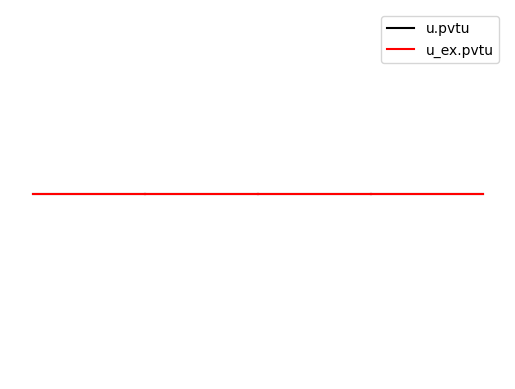

In [41]:
p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()

plt.show()


================ running  mpp ================

start program on 1 procs at Wed Jul  3 18:58:26 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ..

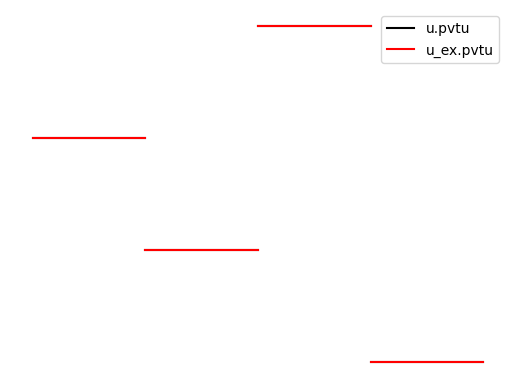

In [43]:
kwargs = {"Problem":"P1Test1D"}
mpp.run(1, config="TUT_laplace", kwargs=kwargs)

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()

plt.show()


================ running  mpp ================

start program on 1 procs at Wed Jul  3 18:58:36 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 2
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ............................

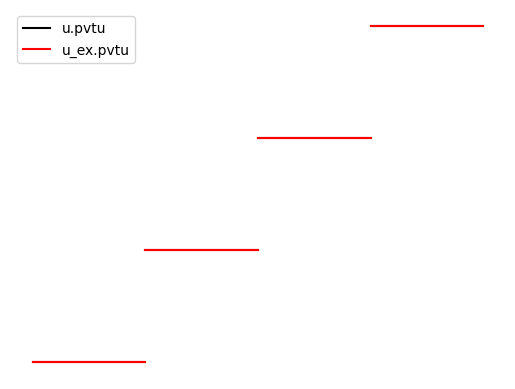

In [44]:
kwargs = {"Problem":"P1Test1D"}
mpp.run(1, config="TUT_mixed", kwargs=kwargs)

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()

plt.show()


================ running  mpp ================

start program on 1 procs at Wed Jul  3 18:58:44 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 2
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ............................

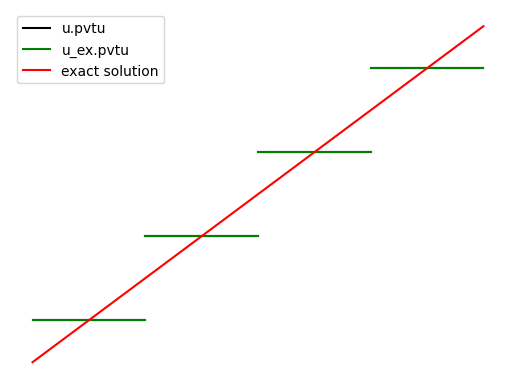

In [45]:
import numpy as np

kwargs = {"Problem":"P1Test1D"}
mpp.run(1, "TUT_mixed",{"Problem":"P1Test1D"})

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='green')
x = np.linspace(0,1,10)
plt.plot(x,x,color='red',label='exact solution')
plt.legend()

plt.show()


================ running  mpp ================

start program on 1 procs at Wed Jul  3 18:58:54 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ..

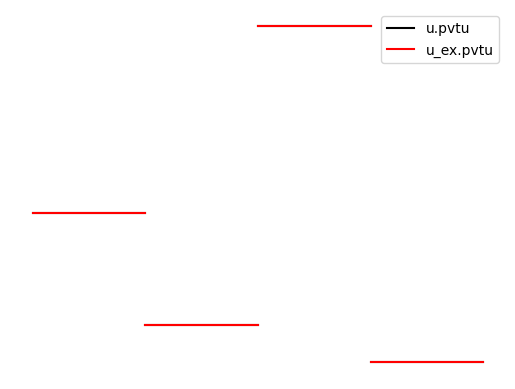

In [46]:
kwargs = {"Problem":"P2Test1D"}
mpp.run(1, config="TUT_laplace", kwargs=kwargs)

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()

plt.show()


================ running  mpp ================

start program on 1 procs at Wed Jul  3 18:59:01 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ..

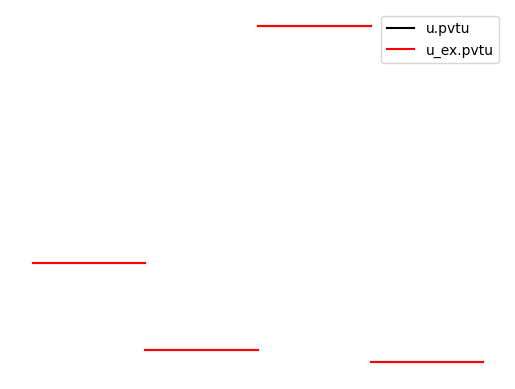

In [47]:
kwargs = {"Problem":"P3Test1D"}
mpp.run(1, config="TUT_laplace", kwargs=kwargs)

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()

plt.show()


================ running  mpp ================

start program on 1 procs at Wed Jul  3 18:59:09 2024
Running on: TOQAJEW
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ..

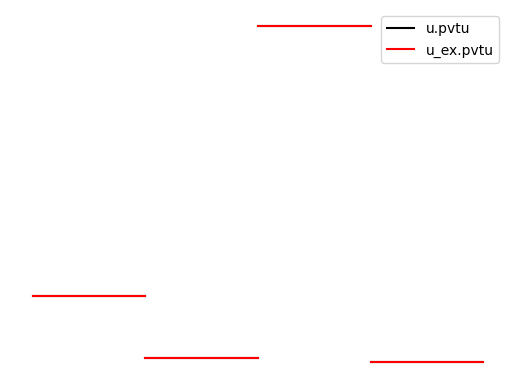

In [48]:
kwargs = {"Problem":"P4Test1D"}
mpp.run(1, config="TUT_laplace", kwargs = kwargs)

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()

plt.show()

## 2. Hyperbolic 1D Problems

### 2.1 Riemann Problem

In [ ]:
mpp.run(2, config='TUT_riemann', kwargs={'Problem': 'Riemann1D', "level": 3})

In [ ]:
@interact(n=widgets.IntSlider(min=0, max=32, step=1, value=0))
def plot_i_frame(n):
    p = mpp.vtu_plot()
    p.add_1d_vtu("Riemann1D.{}.pvtu".format(n))
    p.add_1d_vtu("Riemann1D.exact.{}.pvtu".format(n), color='red')
    plt.legend()

In [53]:
mpp.reset_data()
columns = ["t","Mass","Energy"]
mpp.parse_json()

df = pd.DataFrame(pd.json_normalize(mpp.data[-1]['TransportPDESolver']['iteration_0']), columns=columns)
HTML(df.to_html(index=False))

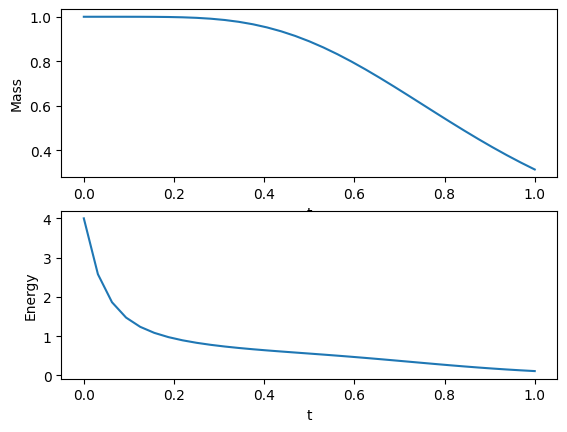

In [55]:
plt.subplot(211)

dict_array = mpp.data[-1]['TransportPDESolver']['iteration_0']
plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')


plt.subplot(212)

dict_array = mpp.data[-1]['TransportPDESolver']['iteration_0']
plt.plot([d['t'] for d in dict_array], [d['Energy'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Energy')

plt.show()